<a href="https://colab.research.google.com/github/asmaaabdelsattar/instant-training/blob/main/Copy_of_text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.30.0 transformers accelerate safetensors torch torchvision
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.2
    Uninstalling diffusers-0.35.2:
      Successfully uninstalled diffusers-0.35.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.35.3
    Uninstalling huggingface-hub-0.35.3:
      Successfully uninstalled huggingface-hub-0.35.3


In [ ]:
from huggingface_hub import notebook_login
notebook_login()   # will ask for your HF token


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/30 [00:00<?, ?it/s]

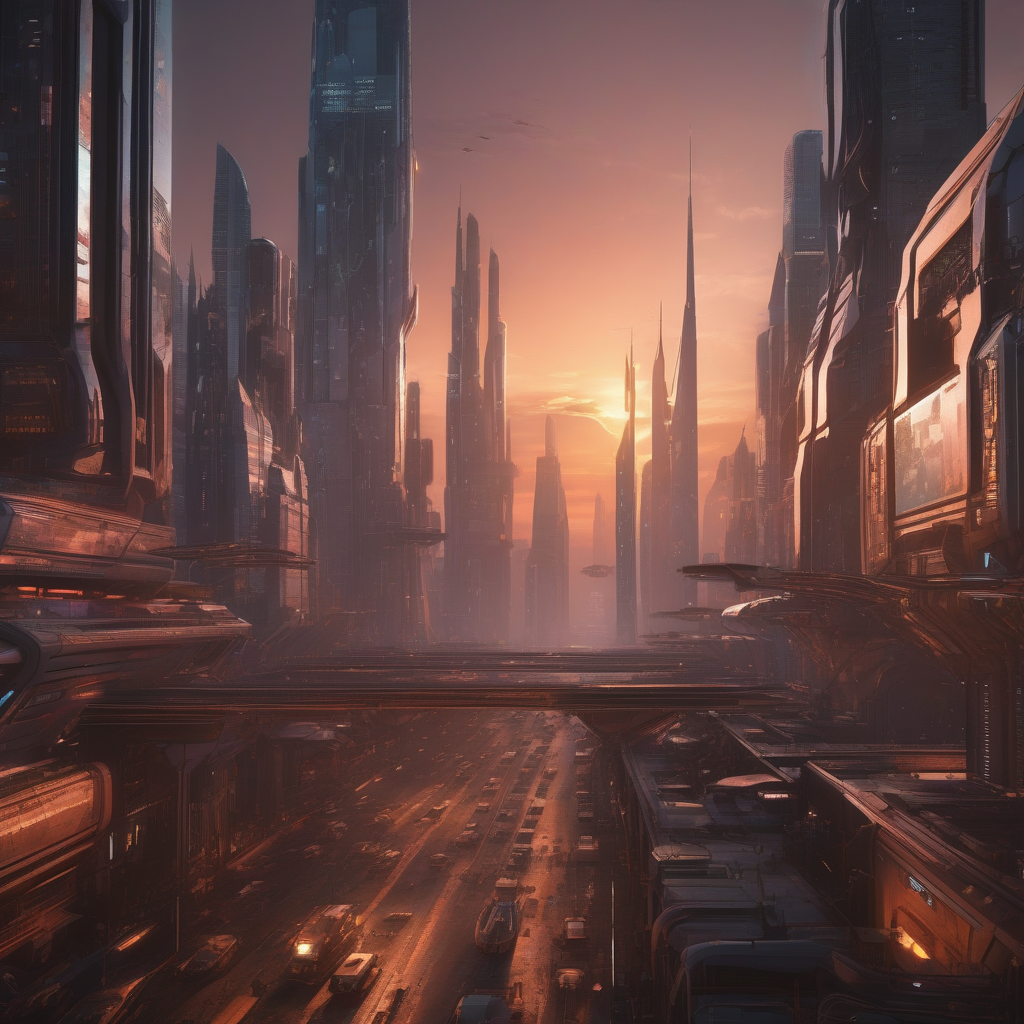

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionXLPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    use_safetensors=True,
)
pipe = pipe.to(device)

prompt = "a futuristic city at sunset, ultra-detailed, cinematic lighting"
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]
image.save("sdxl_test.png")
image


In [ ]:
!pip install gradio

import gradio as gr

def generate(prompt, negative_prompt, steps, guidance, seed):
    generator = torch.Generator(device=device).manual_seed(int(seed))
    image = pipe(prompt, negative_prompt=negative_prompt,
                 num_inference_steps=int(steps),
                 guidance_scale=float(guidance),
                 generator=generator).images[0]
    return image

demo = gr.Interface(
    fn=generate,
    inputs=[
        gr.Textbox(label="Prompt"),
        gr.Textbox(label="Negative Prompt", value="blurry, lowres, text"),
        gr.Slider(10, 60, 30, step=1, label="Steps"),
        gr.Slider(5, 15, 7.5, step=0.5, label="Guidance Scale"),
        gr.Number(value=42, label="Seed"),
    ],
    outputs="image",
    title="🧠 Text-to-Image Generator (Stable Diffusion XL)"
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://612798de98097c2f3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nbformat

path = "/content/drive/MyDrive/Colab Notebooks/text_to_image.ipynb"

with open(path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

with open(path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("Cleaned notebook metadata successfully!")

Cleaned notebook metadata successfully!
